In [ ]:
,,,
@authors: Chandra Mani Sharma & Kapil Tomar 
About dataset: There are following columns in the dataset
id: insignificant, remove this
gender: Categorical, Male/Female
age:
hypertension
heart_disease
ever_married
work_type
Residence_type
avg_glucose_level
bmi
smoking_status
stroke: 1 or 0
,,,



In [26]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [27]:
df=pd.read_csv("data.csv")
#df.describe().to_csv("description.csv")
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [28]:
# Print unique values from columns having categorical values
print("gender unique values")
print(df['gender'].unique())
print(df['gender'].astype('category').cat.categories)

print("ever_married unique values")
print(df['ever_married'].unique())
print(df['ever_married'].astype('category').cat.categories)

print("work_type unique values")
print(df['work_type'].unique())
print(df['work_type'].astype('category').cat.categories)

print("Residence_type unique values")
print(df['Residence_type'].unique())
print(df['Residence_type'].astype('category').cat.categories)

print("smoking_status unique values")
print(df['smoking_status'].unique())
print(df['smoking_status'].astype('category').cat.categories)

gender unique values
['Male' 'Female' 'Other']
Index(['Female', 'Male', 'Other'], dtype='object')
ever_married unique values
['Yes' 'No']
Index(['No', 'Yes'], dtype='object')
work_type unique values
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Index(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'], dtype='object')
Residence_type unique values
['Urban' 'Rural']
Index(['Rural', 'Urban'], dtype='object')
smoking_status unique values
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Index(['Unknown', 'formerly smoked', 'never smoked', 'smokes'], dtype='object')


In [29]:
# Drop the id column as it is insignificant for classification 
df=df.drop(columns='id',axis=1)

In [30]:
# Fill the missing values

df.fillna(df.mode())
df=df.dropna()

# Change the categorical values to numerical
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [31]:
print(df['gender'].unique())
# Converting categorical values to numerical values
df['gender'] = df['gender'].astype('category')
df['ever_married'] = df['ever_married'].astype('category')
df['work_type'] = df['work_type'].astype('category')
df['Residence_type'] = df['Residence_type'].astype('category')
df['smoking_status'] = df['smoking_status'].astype('category')
#df.dtypes
cat_columns = df.select_dtypes(['category']).columns

print(df.gender.unique())

df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df.head()

['Male' 'Female' 'Other']
['Male', 'Female', 'Other']
Categories (3, object): ['Male', 'Female', 'Other']


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [32]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [33]:
arr=df.values
x=arr[:,0:10]
y=arr[:,10]


In [34]:
x_tr,x_val,y_tr,y_val=train_test_split(x,y,test_size=0.30,random_state=3)


In [36]:
# SVC Classifier
classifier_svc=SVC(gamma='auto')
classifier_svc.fit(x_tr,y_tr)

# KNN Classifier
classifier_knn=KNeighborsClassifier()
classifier_knn.fit(x_tr,y_tr)

# Decision Tree
classifier_dtree=DecisionTreeClassifier()
classifier_dtree.fit(x_tr,y_tr)

# Gaussian Naive Bayes Classifier
classifier_gnb=GaussianNB()
classifier_gnb.fit(x_tr,y_tr)

GaussianNB()

In [37]:
pr_svc=classifier_svc.predict(x_val)
pr_knn=classifier_knn.predict(x_val)
pr_dtree=classifier_dtree.predict(x_val)
pr_gnb=classifier_gnb.predict(x_val)


In [41]:
print("Accuracy of SVC:",accuracy_score(pr_svc,y_val)*100,"%")
print("Accuracy of KNN:",accuracy_score(pr_knn,y_val)*100,"%")
print("Accuracy of DTree:",accuracy_score(pr_dtree,y_val)*100,"%")
print("Accuracy of GNB:",accuracy_score(pr_gnb,y_val)*100,"%")

Accuracy of SVC: 95.85879158180583 %
Accuracy of KNN: 95.17990495587237 %
Accuracy of DTree: 92.4643584521385 %
Accuracy of GNB: 88.73048200950441 %


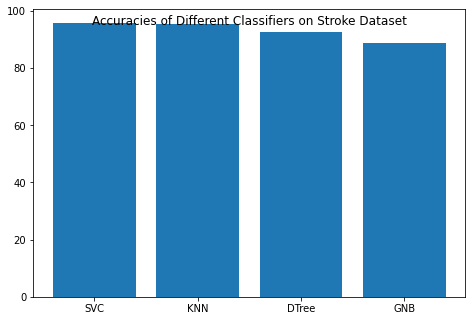

In [47]:
# Plotting the accuracy
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Accuracies of Different Classifiers on Stroke Dataset')
ax = fig.add_axes([0,0,1,1])
classifiers = ['SVC', 'KNN', 'DTree', 'GNB']
accu = [accuracy_score(pr_svc,y_val)*100,accuracy_score(pr_knn,y_val)*100,accuracy_score(pr_dtree,y_val)*100,accuracy_score(pr_gnb,y_val)*100]
ax.bar(classifiers,accu)
plt.show()

In [49]:
# Saving trained models
import pickle
import joblib

In [50]:
joblib.dump(classifier_svc,"model_svc.sav")

['model_svc.sav']

In [57]:
# Checking the loaded model
loaded_model=joblib.load('model_svc.sav')
#print(loaded_model.score(x_val,y_val))
x=loaded_model.predict([[1,2,1,1,1,1,1,1,1,1]])
if(x):
    print("There are high chances of stroke based on the input values!!")
else:
    print("System does not predict an onset of Cardiac Stroke!!")

System does not predict an onset of Cardiac Stroke!!
